### REPLACE BACKGROUND JUST FROM MASK

In [6]:
# arrays = "/Users/sanemleblebici/Desktop/deep_learning_project/data/carseg_data/arrays"
# backgrounds = "/Users/sanemleblebici/Desktop/deep_learning_project/data/carseg_data/images/landscapes"
# output = "/Users/sanemleblebici/Desktop/deep_learning_project/data/carseg_data/background_augmented"


# import os
# import numpy as np
# import cv2
# from random import choice

# def replace_backgrounds(input_folder, background_folder, output_folder):
#     # Create the output folder if it doesn't exist
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     # List all npy files in the input folder
#     npy_files = [f for f in os.listdir(input_folder) if f.endswith('.npy')]

#     for npy_file in npy_files:
#         if "black_5_doors_" not in npy_file:
#             continue
#         # Load the numpy array
#         npy_path = os.path.join(input_folder, npy_file)
#         img_array = np.load(npy_path)

#         # Choose a random background image
#         background_file = choice(os.listdir(background_folder))
#         background_path = os.path.join(background_folder, background_file)

#         # Resize the background image to 256x256
#         background = cv2.imread(background_path)
#         background = cv2.resize(background, (256, 256))
#         background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

#         # Iterate through the 'class' channel and replace values where class is 0
#         for i in range(img_array.shape[0]):
#             for j in range(img_array.shape[1]):
#                 if img_array[i, j, 3] == 0:
#                     # Replace r, g, b values with the corresponding pixel values from the background
#                     img_array[i, j, 0:3] = background[i, j]

#         # Save the modified numpy array to the output folder
#         output_path = os.path.join(output_folder, f"{npy_file}")
#         np.save(output_path, img_array)


# arrays = "/Users/sanemleblebici/Desktop/deep_learning_project/data/carseg_data/arrays"
# backgrounds = "/Users/sanemleblebici/Desktop/deep_learning_project/data/carseg_data/images/landscapes"
# output = "/Users/sanemleblebici/Desktop/deep_learning_project/data/carseg_data/background_augmented"

# replace_backgrounds(arrays, backgrounds, output)


### REPLACE BACKGROUNDS AND FIX THE MASKS USING SEGMENTED IMAGES

In [6]:
import os
import numpy as np
import cv2
from random import choice

def replace_backgrounds_with_condition(input_folder, background_folder, mask_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # List all npy files in the input folder
    npy_files = [f for f in os.listdir(input_folder) if f.endswith('.npy')]

    for npy_file in npy_files:
        if "photo_" not in npy_file:
            continue
        # Load the numpy array
        npy_path = os.path.join(input_folder, npy_file)
        img_array = np.load(npy_path)

        # Choose a random background image
        background_file = choice(os.listdir(background_folder))
        background_path = os.path.join(background_folder, background_file)

        # Resize the background image to 256x256
        background = cv2.imread(background_path)
        background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
        background = cv2.resize(background, (256, 256))

        # Load the greyscale mask image
        mask_file = os.path.join(mask_folder, npy_file.replace('.npy', '.png'))
        mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)
        
        for i in range(1,9):
            img_array[img_array[:, :, 3] == 10 * i, 3] = 0
        img_array[img_array[:, :, 3] == 90, 3 ] = 9
        
        # Iterate through the mask image
        for i in range(img_array.shape[0]):
            for j in range(img_array.shape[1]):
                if mask[i, j] == 0:
                    if img_array[i, j, 3] != 9:
                        img_array[i, j, 0:3] = background[i, j]
                    # Replace r, g, b values with the corresponding pixel values from the background
                else:
                    # Replace the class channel directly with the greyscale pixel value
                    img_array[i, j, 3] = mask[i, j]

        # Save the modified numpy array to the output folder
        output_path = os.path.join(output_folder, f"{npy_file}")
        np.save(output_path, img_array)


    
arrays = "/Users/sanemleblebici/Desktop/deep_learning_project/data/carseg_data/arrays_no_bg_augment"
backgrounds = "/Users/sanemleblebici/Desktop/deep_learning_project/data/carseg_data/unused/images/landscapes"
# masks = "/Users/sanemleblebici/Desktop/deep_learning_project/data/dataset_256_256/training/labels"
masks = "/Users/sanemleblebici/Desktop/deep_learning_project/data/dataset_256_256/test/labels"
output = "/Users/sanemleblebici/Desktop/deep_learning_project/data/carseg_data/background_augmented"

replace_backgrounds_with_condition(arrays, backgrounds, masks, output)


[0 1 2 4 5 6 7 8 9]


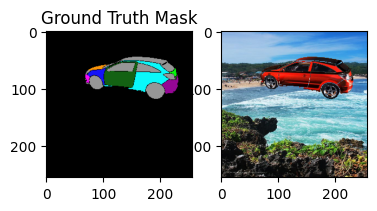

[0 1 2 4 5 6 7 8 9]


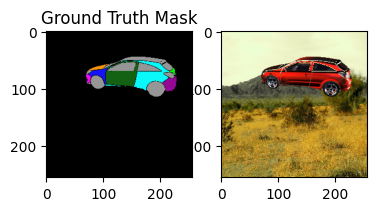

[0 2 4 5 6 9]


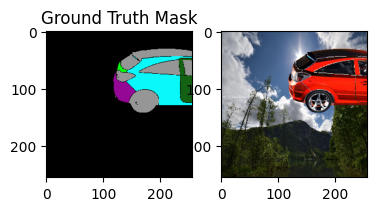

[0 2 3 4 5 6 9]


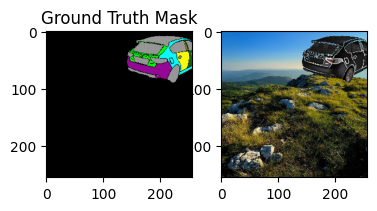

[0 2 3 4 5 6 7 9]


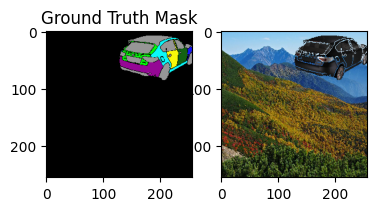

[0 2 4 5 6 9]


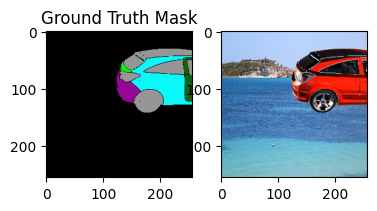

[0 1 2 3 4 5 6 7 8 9]


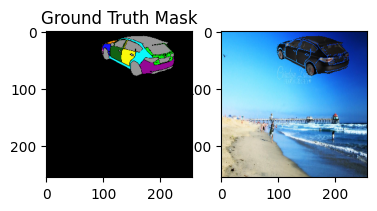

[0 1 2 4 5 7 8 9]


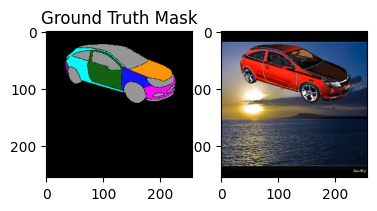

[0 1 2 4 5 6 7 8 9]


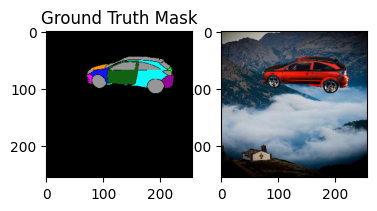

[0 2 4 5 6 9]


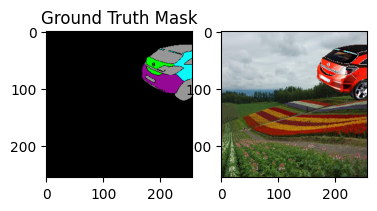

[0 2 4 5 6 9]


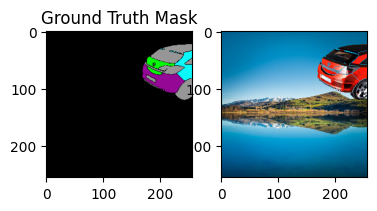

In [3]:
import matplotlib as plt
import matplotlib.pyplot as plt

mask_path = "/Users/sanemleblebici/Desktop/deep_learning_project/data/carseg_data/background_augmented"

# Define color mapping for each class
color_mapping = {
        0: (0,0,0),
        1: (250, 149, 10),
        2: (19, 98, 19),
        3: (249, 249, 10),
        4: (10, 248, 250),
        5: (149, 7, 149),
        6: (5, 249, 9),
        7: (20, 19, 249),
        8: (249, 9, 250),
        9: (150, 150, 150),
    }

def colorize_segmentation_mask(segmentation_tensor_or_mask, mask = False):
    # Convert the PyTorch tensor to a NumPy array
    if mask == False:
        segmentation_array = segmentation_tensor_or_mask.squeeze(0).cpu().numpy()
        
    else:
        segmentation_array = segmentation_tensor_or_mask

    # Create a mapping from actual class values to color values
    class_to_color = {class_value: color_mapping[class_value] for class_value in np.unique(segmentation_array)}

    # Create an RGB image with the colored segmentation mask
    colored_mask = np.zeros((256, 256, 3), dtype=np.uint8)
    for class_value, color in class_to_color.items():
        colored_mask[segmentation_array == class_value] = color

    return colored_mask

index = 0 
for im in os.listdir(mask_path):

    mask_p = os.path.join(mask_path, im)
    mask = np.load(mask_p)
    mask_split = mask[:, :, 3]
    mask_split = mask_split
    mask_split = mask_split.astype(int)
    print(np.unique(mask_split))
    
    img = mask[:,:,:3]
    
    
    plt.subplot(1, 3, 1)
    plt.imshow(colorize_segmentation_mask(mask_split, True))
    plt.title('Ground Truth Mask')

    plt.subplot(1, 3, 2)
    plt.imshow(img)
    
    plt.show() 

    if index == 10:
        break
    index = index + 1        